# Pharmaceutical multiple stores Customer Exploration

In [93]:
import pandas as pd
import numpy as np
import dvc.api
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import mlflow

In [94]:
#Create and configure logger
logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')

In [95]:
#Creating an object
logger=logging.getLogger()

In [96]:
mlflow.set_experiment('Cusotmer_Exp')

In [97]:
path = ['data/store.csv', 'data/train.csv', 'data/test.csv']
version = ['store_v1', 'train_v1', 'test_v1']

In [98]:
    repo = '/home/michael/Pharmaceutical-Sales-prediction-across-multiple-stores'
    data_url = dvc.api.get_url(
        path = path[0],
        repo = repo,
        rev=version[0]
        )
    data_url2 = dvc.api.get_url(
        path = path[1],
        repo = repo,
        rev=version[1]
        )
    data_url3 = dvc.api.get_url(
        path = path[2],
        repo = repo,
        rev=version[2]
        )

    df_store = pd.read_csv(data_url)
    df_train = pd.read_csv(data_url2)
    df_test = pd.read_csv(data_url3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [99]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [100]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [101]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [102]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [103]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [104]:
len(df_train)

1017209

In [105]:
# # Log data params
# mlflow.log_param('data_url Store', data_url)
# mlflow.log_param('data_version Store', version[0])
# mlflow.log_param('input_rows Store', df_store.shape[0])
# mlflow.log_param('input_cols Store', df_store.shape[1])

# mlflow.log_param('data_url Train', data_url2)
# mlflow.log_param('data_version Train', version[1])
# mlflow.log_param('input_rows Train', df_train.shape[0])
# mlflow.log_param('input_cols Train', df_train.shape[1])

# mlflow.log_param('data_url Test', data_url3)
# mlflow.log_param('data_version Test', version[2])
# mlflow.log_param('input_rows Test', df_test.shape[0])
# mlflow.log_param('input_cols Test', df_test.shape[1])

In [106]:
#!mlflow ui

In [107]:
# Creating a year, month and day columns on df_train dataset
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['WeekOftheYear'] = df_train['Date'].dt.weekofyear

<ipython-input-107-d86a2aab3632>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_train['WeekOftheYear'] = df_train['Date'].dt.weekofyear


In [108]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [109]:
# Checking for null values
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOftheYear    0
dtype: int64

In [110]:
# checking for null values
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [111]:
# checking for null values
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [112]:
len(df_store)

1115

In [113]:
# impute the missing value in store data and checking if there is any left
df_test['Open'].fillna(df_test['Open'].mode, inplace = True)
df_test.isnull().values.any()

False

In [114]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [115]:
# Filling the missing values with 
df_store['Promo2SinceWeek'].fillna(df_store['Promo2SinceWeek'].mode, inplace = True)
df_store['Promo2SinceYear'].fillna(df_store['Promo2SinceYear'].mode, inplace = True)
df_store['PromoInterval'].fillna(df_store['PromoInterval'].mode, inplace = True)
df_store.isnull().values.any()

True

In [116]:
# impute the missing values in store data
df_store['CompetitionOpenSinceMonth'].fillna(df_store['CompetitionOpenSinceMonth'].mode, inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(df_store['CompetitionOpenSinceYear'].mode, inplace = True)
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)
df_store.isnull().values.any()

False

In [117]:
# Merging df train and df store
store_train = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

In [118]:
store_train.groupby('StoreType')['Customers', 'Sales','Store'].sum()

<ipython-input-118-09c6a1794738>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_train.groupby('StoreType')['Customers', 'Sales','Store'].sum()


,Customers,Sales,Store
StoreType,,,
a,363541434,3165334859,308955088
b,31465621,159231395,8897182
c,92129705,783221426,83229564
d,156904995,1765392943,166957910


In [119]:
# Create a Day of Week feature
store_train['day_of_week'] = store_train['Date'].dt.day_name()

In [120]:
store_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'WeekOftheYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'day_of_week'],
      dtype='object')

# Correlation matrix 

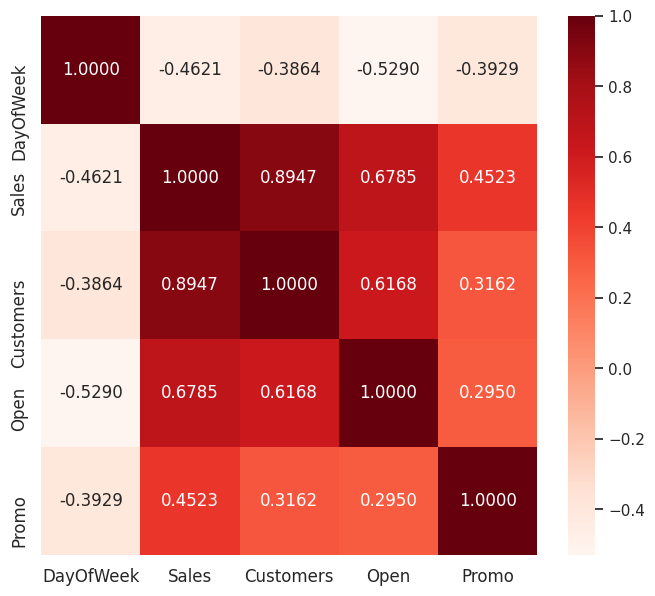

In [198]:
#correlation matrix
corrMatrix= store_train[['DayOfWeek','Sales','Customers','Open', 'Promo']].corr()
f, ax = plt.subplots(figsize=(8, 7))
res=sns.heatmap(corrMatrix,cmap="Reds",annot=True,fmt='.4f',annot_kws={"size":12})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
plt.show()

The correlation matrix shows that Customers and Sales are high affect by each other nearly 89% 

In [122]:
len(df_train.Store.value_counts())

1115

In [123]:
stores = df_train.groupby('Store')

In [124]:
stores_total = stores['Sales'].sum()

In [125]:
stores_total.head()

Store
1    3716854
2    3883858
3    5408261
4    7556507
5    3642818
Name: Sales, dtype: int64

In [126]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_counts(df:pd.DataFrame, column1:str) -> None:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df, x=column1)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column1}', size=20, fontweight='bold')
    plt.show()

In [127]:
train_store = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

In [128]:
week_day_df = store_train.groupby('day_of_week')

In [129]:
promo = pd.DataFrame()
promo['train promo'] = df_train.Promo
promo['test promo'] = df_test.Promo

In [130]:
promo.head()

,train promo,test promo
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


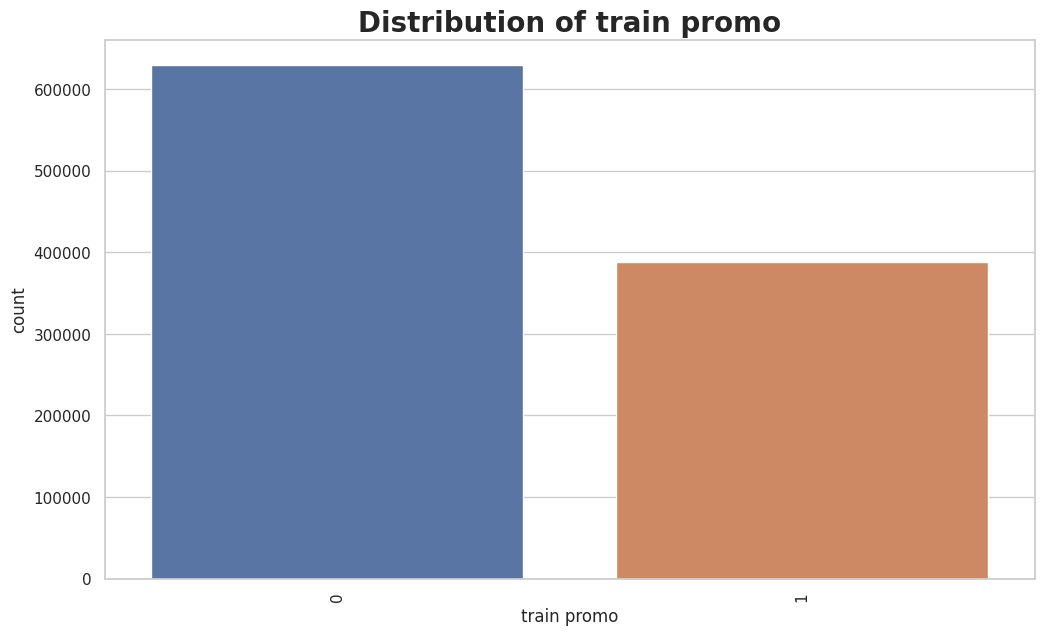

In [233]:
# Distribution of train promotion
plot_count(promo, 'train promo')

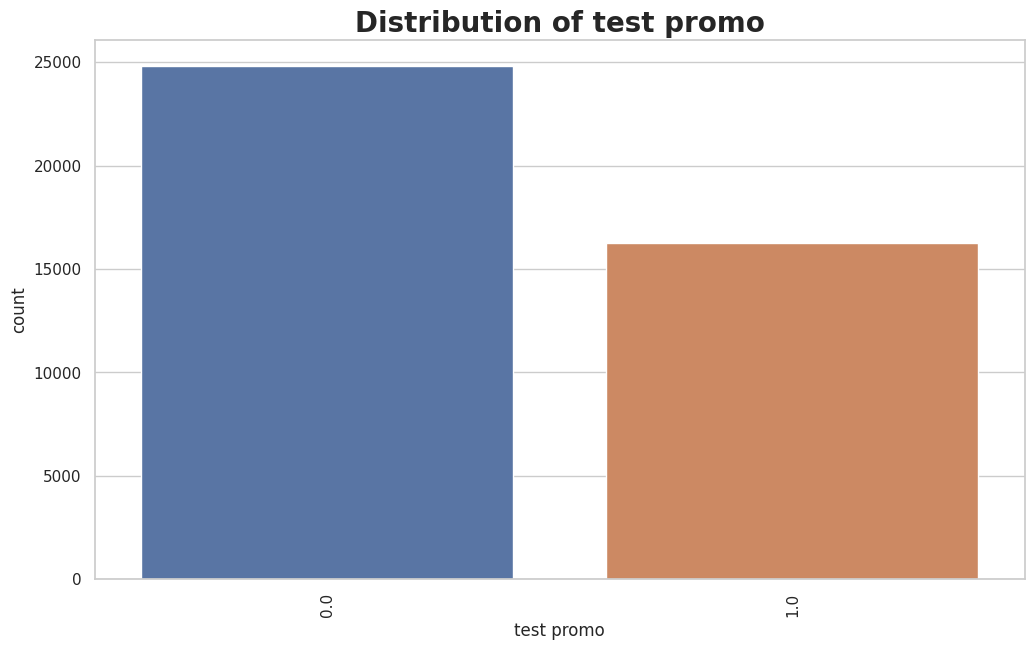

In [234]:
# Distribution of test promotion
plot_count(promo, 'test promo')

In [133]:
(promo['test promo'].value_counts().tolist()[0]/promo['test promo'].value_counts().tolist()[1],
promo['train promo'].value_counts().tolist()[0]/promo['train promo'].value_counts().tolist()[1])

(1.5263157894736843, 1.6211322407750979)

In [134]:
len(promo[promo['test promo'] == 0])/len(promo[promo['test promo']==1])

1.5263157894736843

In [135]:
len(promo[promo['train promo'] == 0])/len(promo[promo['train promo']==1])

1.6211322407750979

In [136]:
#check seasonality for the given store
def seasonality(store):
    sale = df_train[df_train.Store == store]
    sale = sale[(sale.Year == 2015) | (sale.Year == 2014) | (sale.Year == 2013)]
    sale = sale.sort_values(by = "Date",ascending= False)
    sns.set(rc = {'figure.figsize':(20,8)})
    sns.lineplot(x = sale["Date"], y = sale["Sales"], color = 'red')
    plt.xticks(rotation=90)
    plt.title(f'seasonality of store {store}', size=20, fontweight='bold')
    plt.xlabel('Date', fontsize=18, fontweight = 'bold')
    plt.ylabel('Sales', fontsize=16, fontweight = 'bold')
    plt.show()

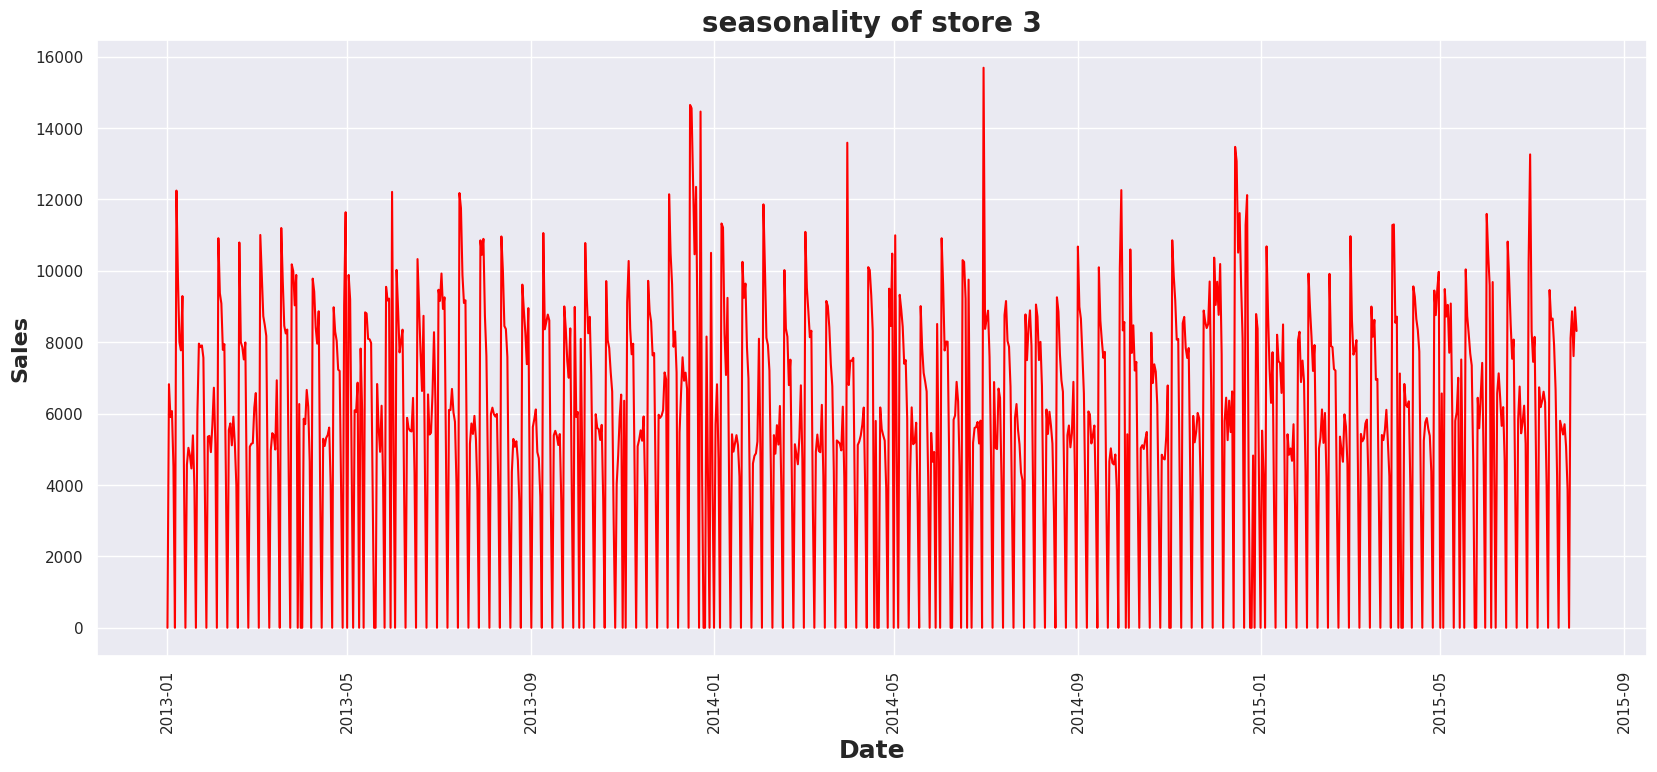

In [137]:
seasonality(3)

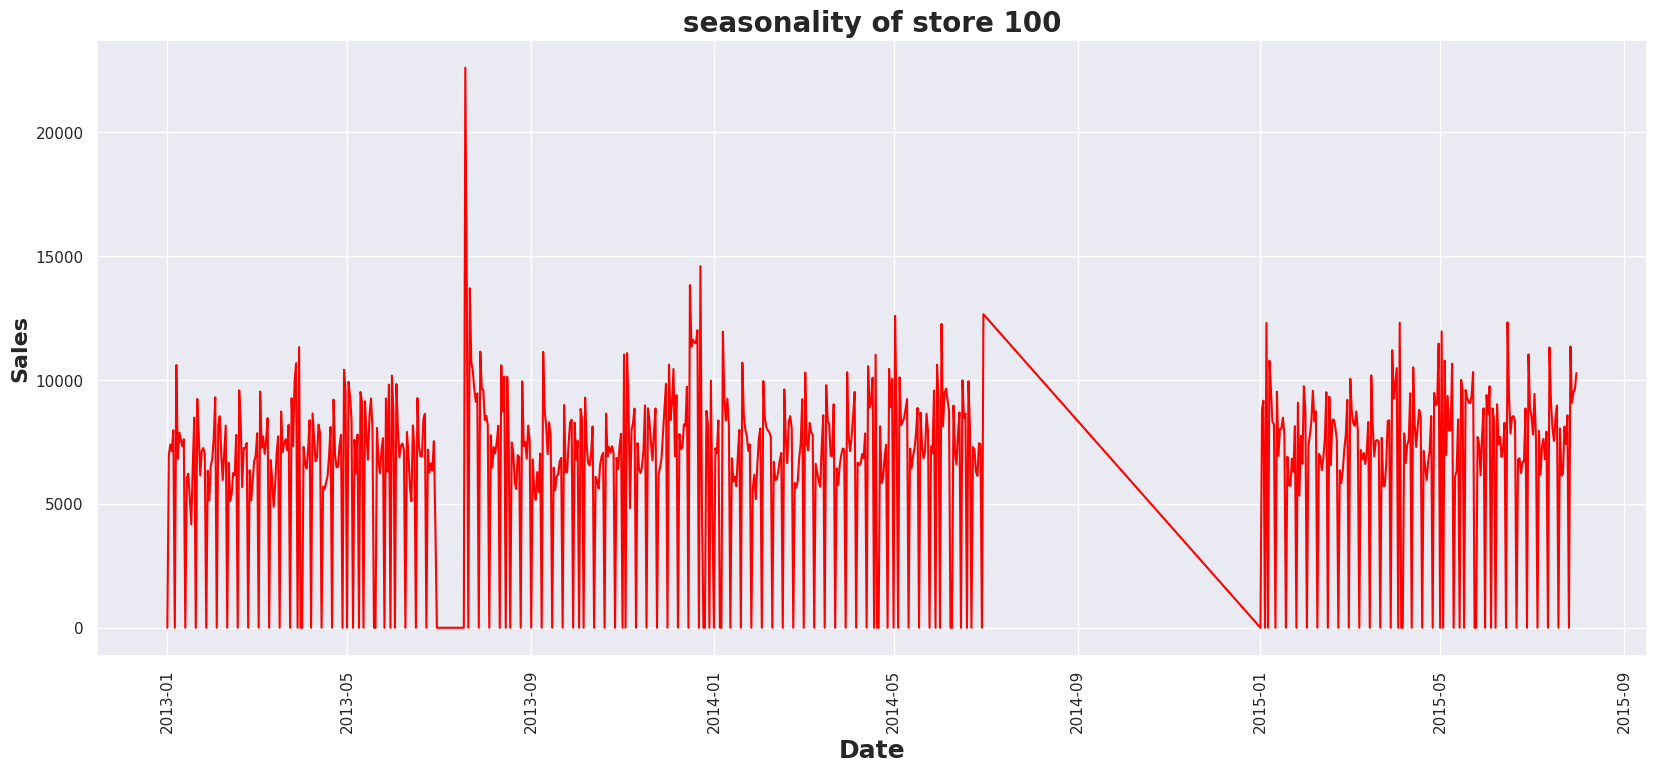

In [138]:
seasonality(100)

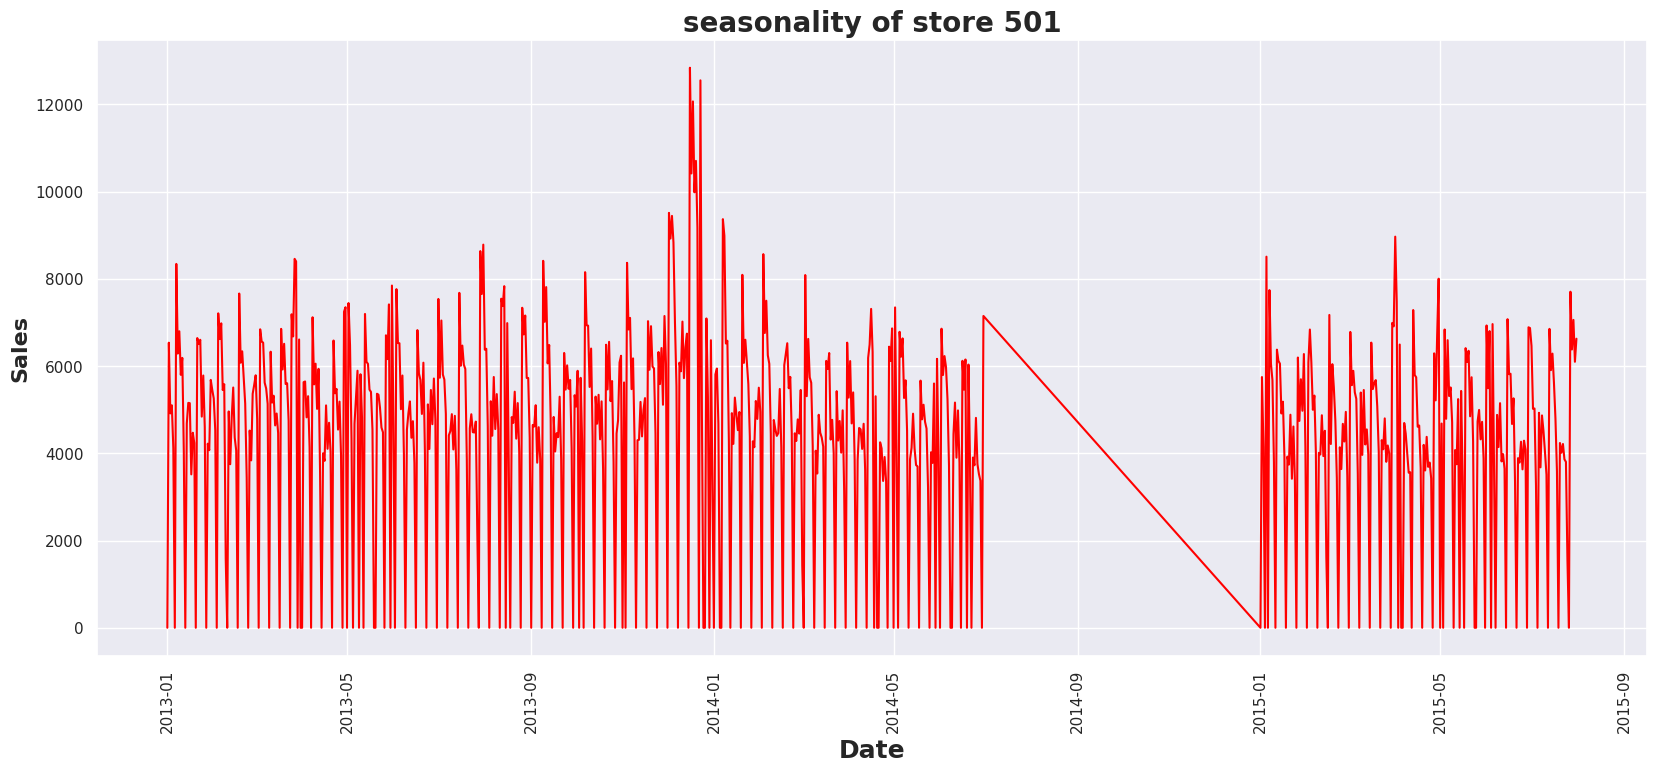

In [139]:
seasonality(501)

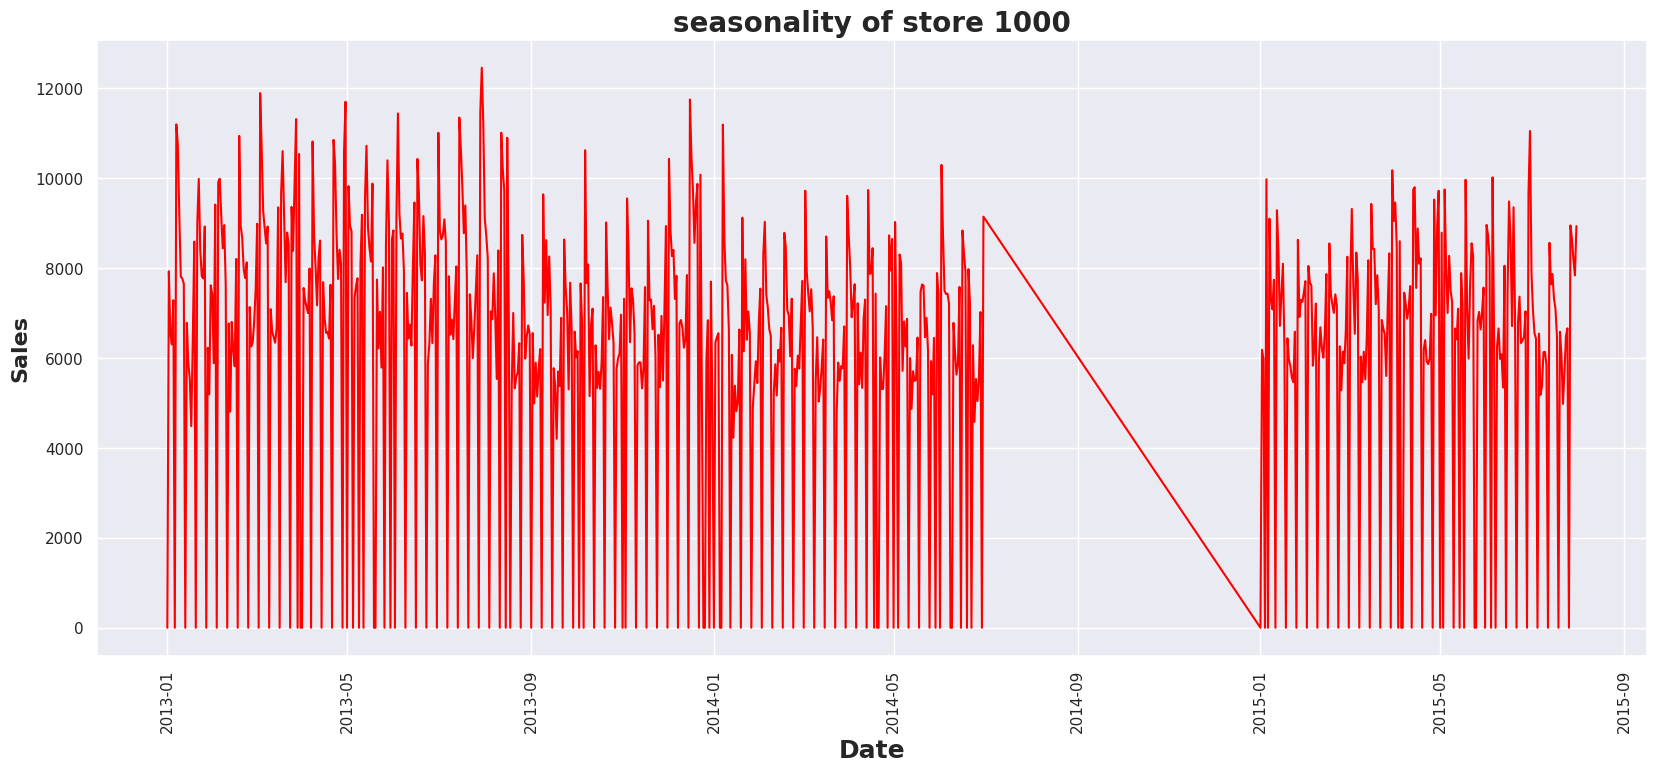

In [140]:
seasonality(1000)

In [141]:
#sales behavior before, during and after holidays
pre_holiday = df_train[(df_train["Date"]> '2013-12-09') & (df_train["Date"]< '2013-12-22')  ]

during_holiday= df_train[(df_train["Date"]> '2013-12-22') & (df_train["Date"]< '2013-12-31')  ]

post_holiday = df_train[(df_train["Date"]> '2013-12-31') & (df_train["Date"]< '2014-01-15')  ]

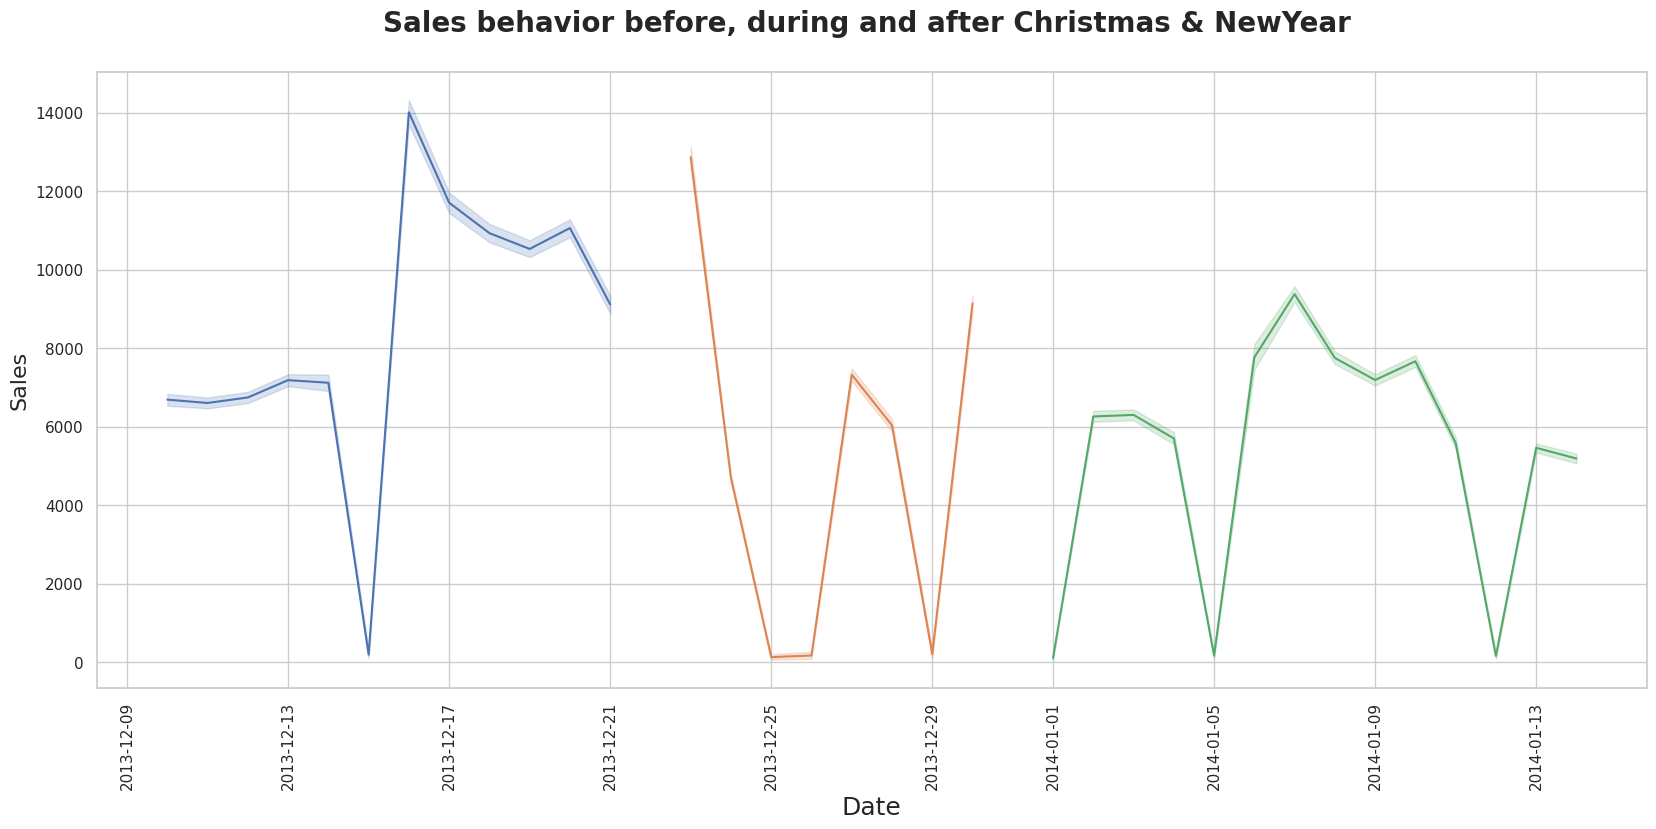

In [199]:
sns.lineplot(x = pre_holiday["Date"] , y = pre_holiday["Sales"])
sns.lineplot(x = during_holiday["Date"] , y = during_holiday["Sales"])
sns.lineplot(x = post_holiday["Date"] , y = post_holiday["Sales"])
plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.title(f'Sales behavior before, during and after Christmas & NewYear \n', size=20, fontweight='bold')
plt.show()

In [225]:
# Store with maximum sale count
df_train[df_train["Sales"] == df_train["Sales"].max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear,WeekOfYear
44393,909,1,2015-06-22,41551,1721,1,0,0,0,2015,6,22,26,26


In [229]:
train_store.groupby('Store')[['Sales','Customers']].sum().sort_values('Sales', ascending=False).head()

,Sales,Customers
Store,,
262,19516842,3204694
817,17057867,2454370
562,16927322,2924960
1114,16202585,2509542
251,14896870,1908934


In [232]:
train_store.groupby('Store')[['Sales','Customers']].sum().sort_values('Sales', ascending=True).head()

,Sales,Customers
Store,,
307,2114322,240704
543,2179287,187583
198,2268273,264690
208,2302052,324162
263,2306075,221342


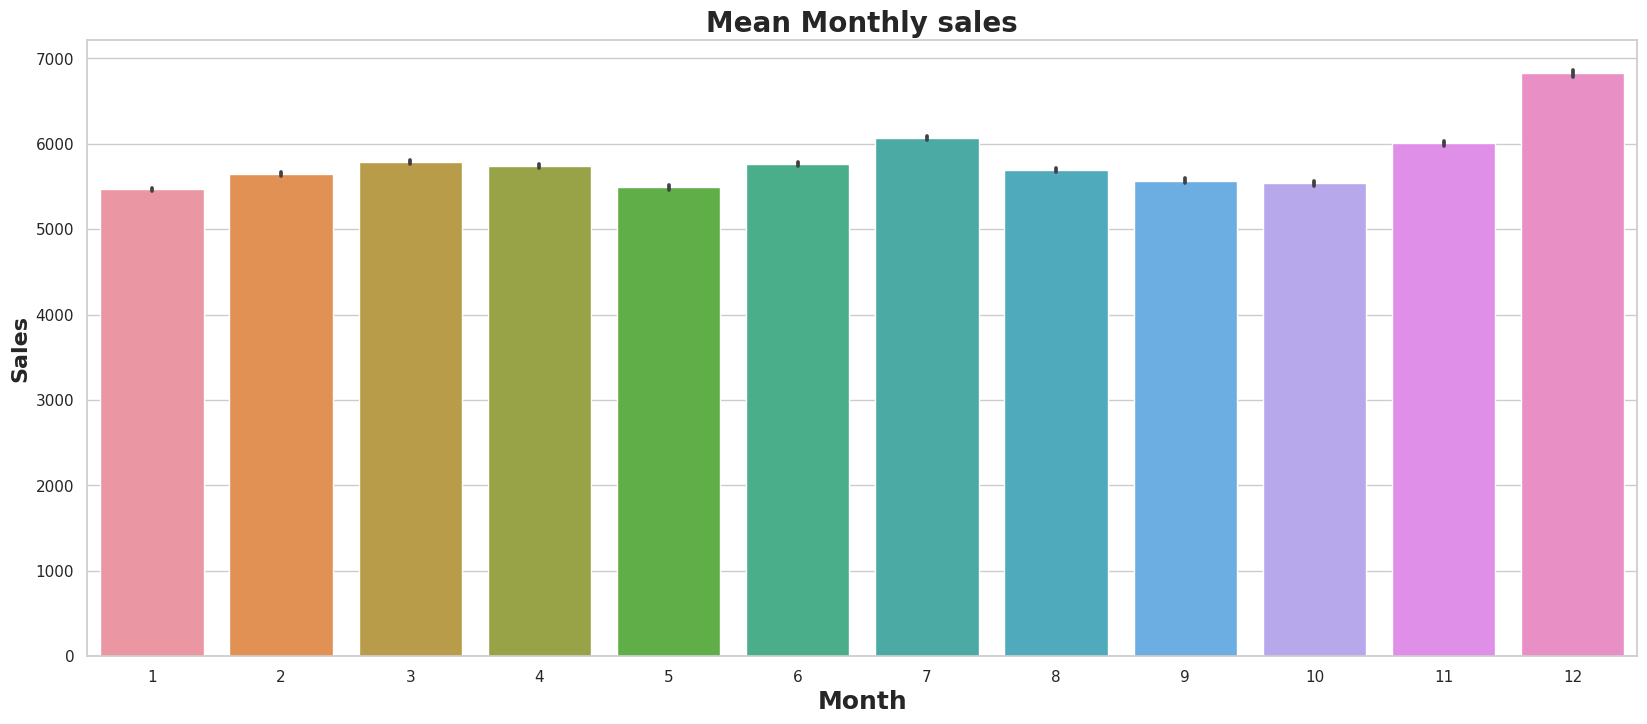

In [163]:
sns.set(style="whitegrid")

ax = sns.barplot(x="Month", y="Sales", data=train_store)
plt.xticks(rotation=0)
plt.title(f'Mean Monthly sales', size=20, fontweight='bold')
plt.xlabel('Month', fontsize=18, fontweight = 'bold')
plt.ylabel('Sales', fontsize=16, fontweight = 'bold')
plt.show()

The plot shows how the on the end of the year there is an increase in sales 

In [146]:
#data extraction
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['WeekOfYear'] = df_train['Date'].dt.weekofyear
#df_train.head()

<ipython-input-146-4f295b7dba1b>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_train['WeekOfYear'] = df_train['Date'].dt.weekofyear


In [147]:
print(df_train.shape)
# closed_stores = df_train[(df_train['Open'] == 0) & (df_train['Sales'] == 0)].index
# df_train.drop(closed_stores,inplace = True)
# print(df_train.shape)

(1017209, 14)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


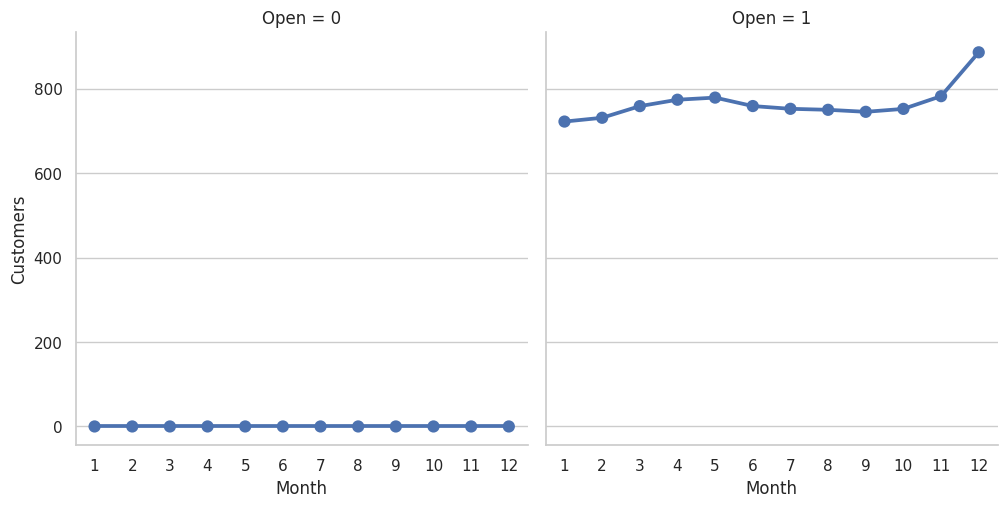

In [151]:
sns.factorplot(data = df_train, x = 'Month', 
               y = "Customers", 
               col = 'Open', # sales per promo  in cols
              )
plt.show()

Open and closing of store have a huge impact on customer loss

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


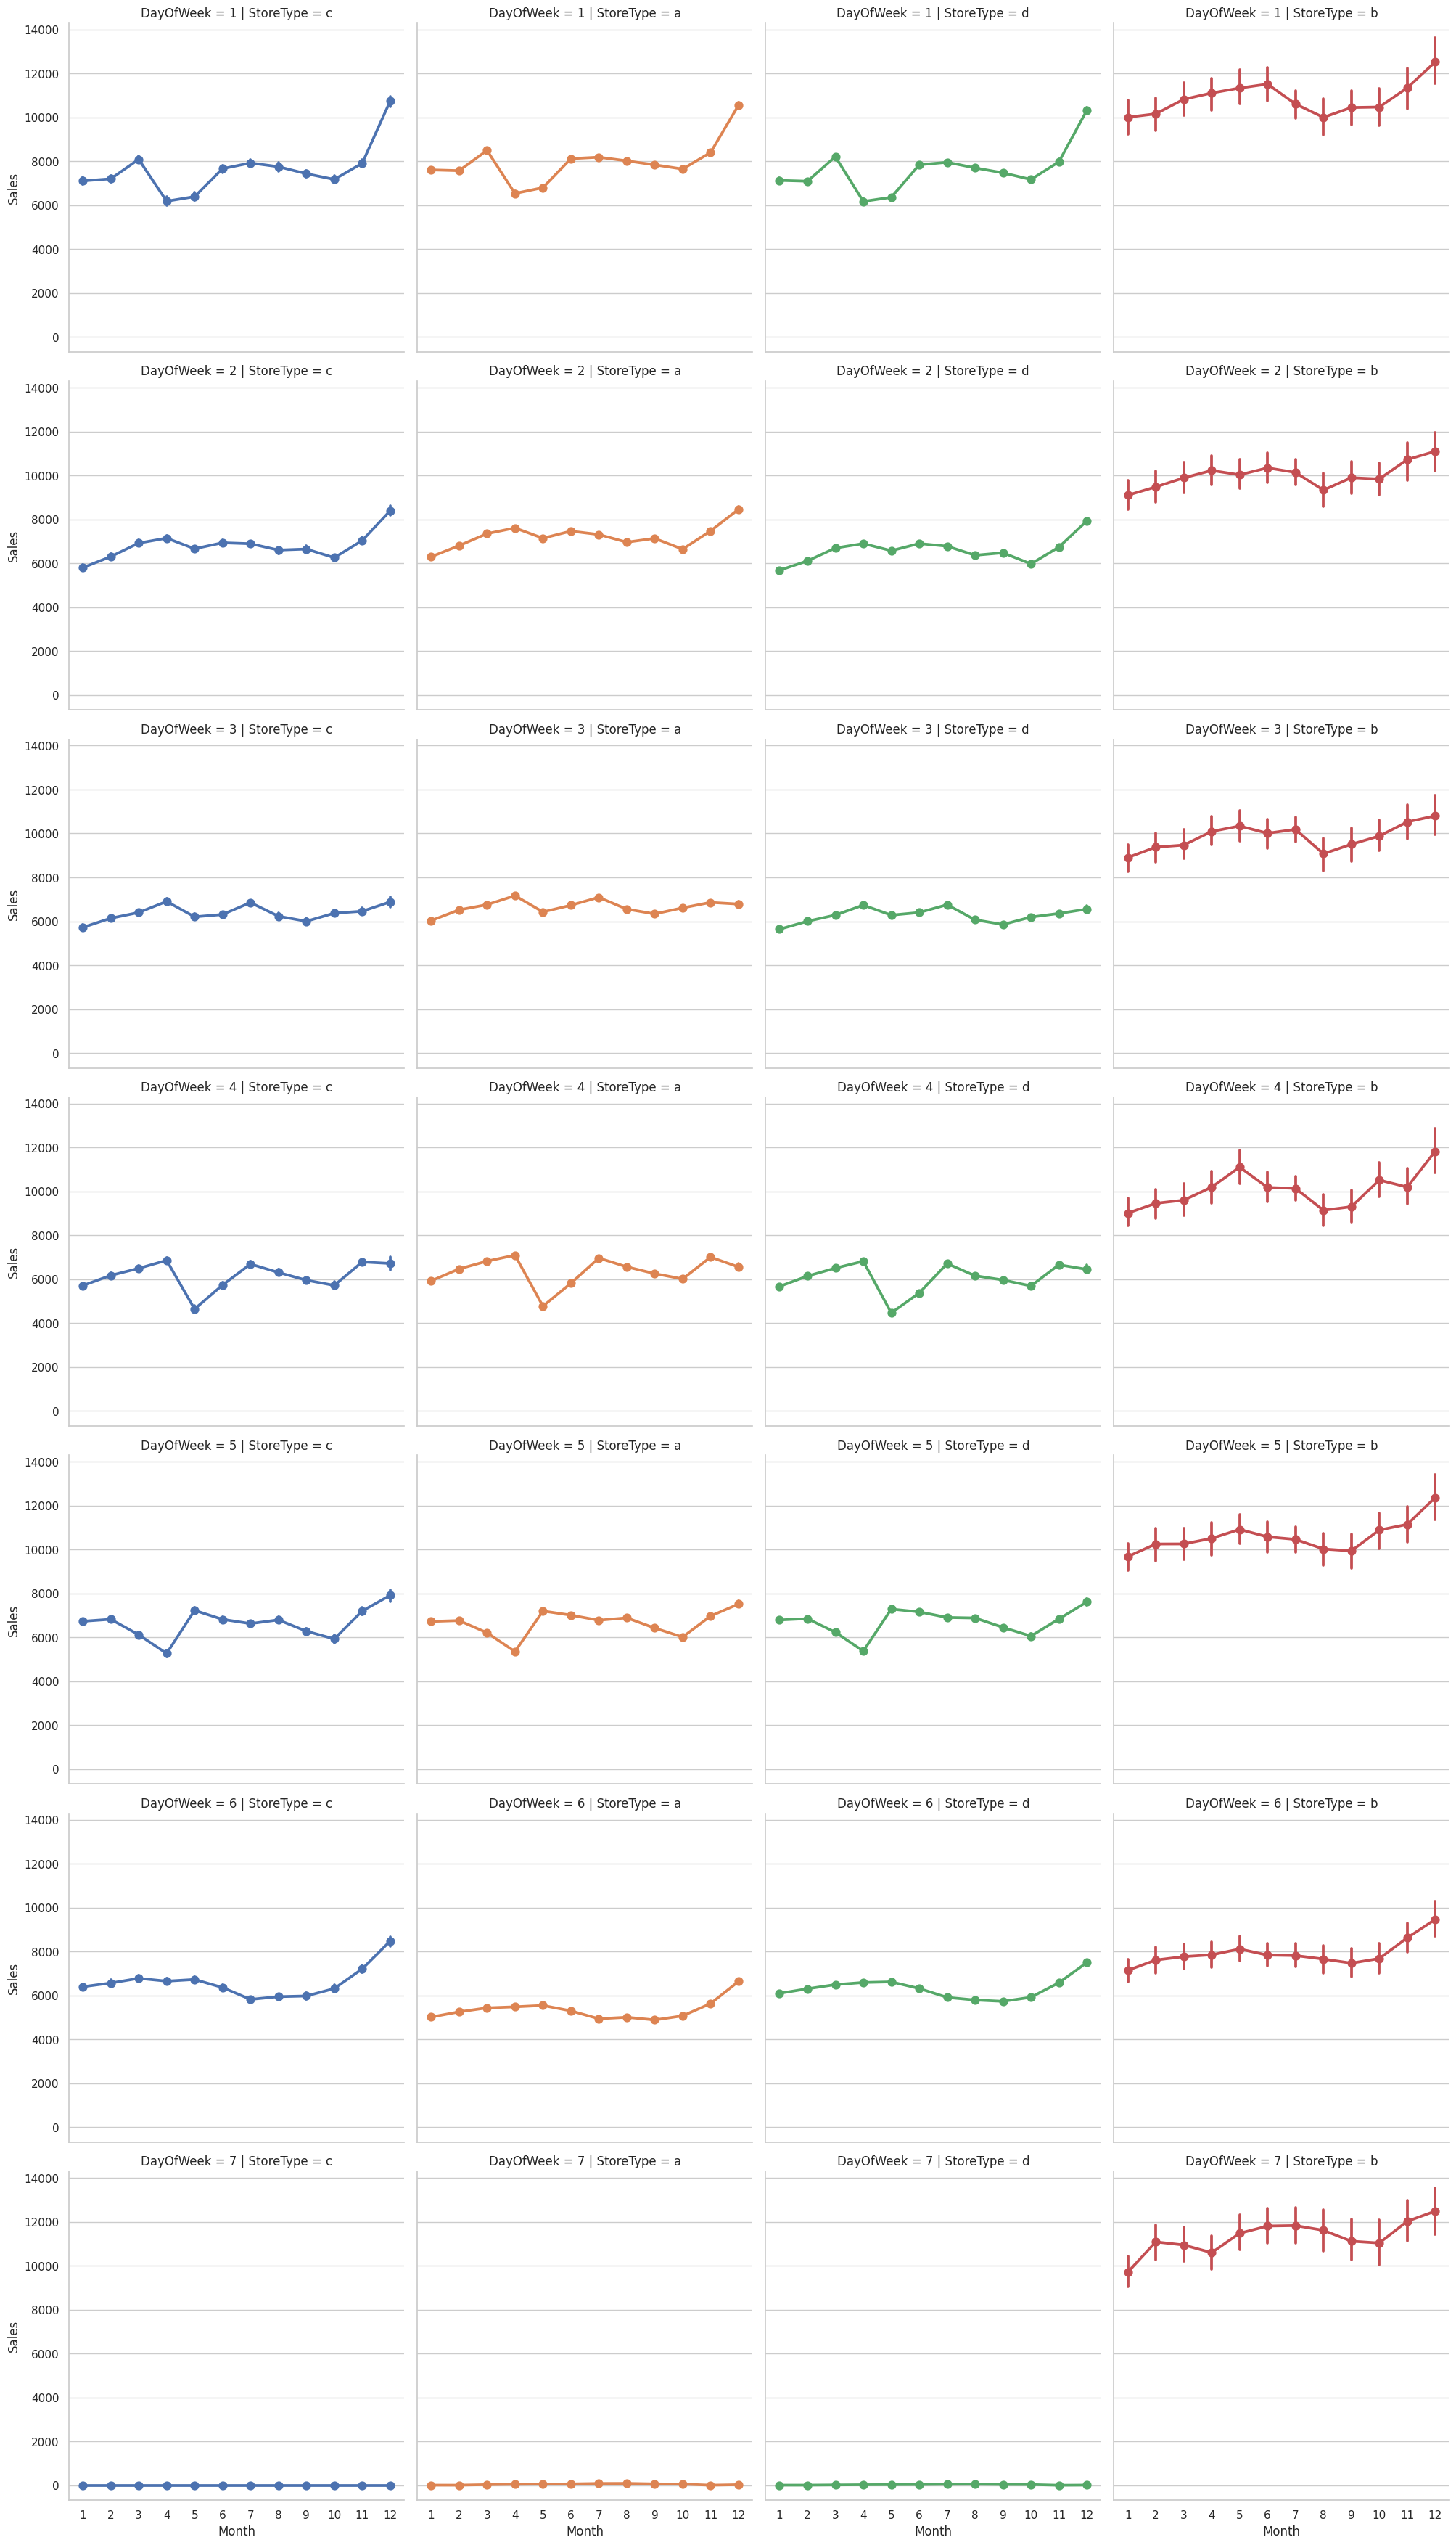

In [165]:
#customers trends
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'DayOfWeek', # per day of week in the stores
               )
plt.show()

- From the type of stores type B is open on weeknds.
- The graph shows an increase level of sales and a high number of sales through out the year in total.

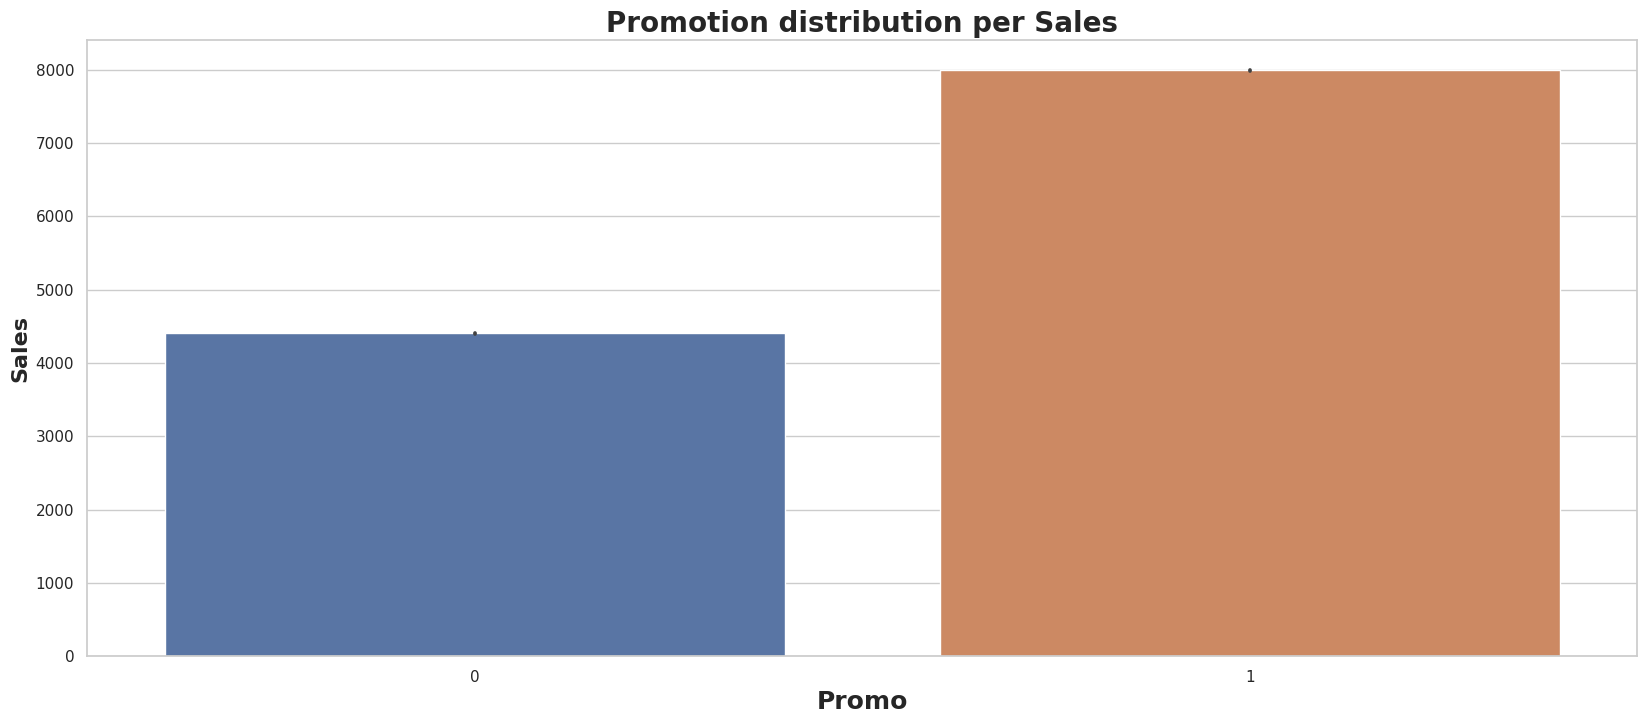

In [178]:
sns.barplot(x = df_train["Promo"] , y = df_train["Sales"])
plt.xticks(rotation=0)
plt.title(f'Promotion distribution per Sales', size=20, fontweight='bold')
plt.xlabel('Promo', fontsize=18, fontweight = 'bold')
plt.ylabel('Sales', fontsize=16, fontweight = 'bold')
plt.show()

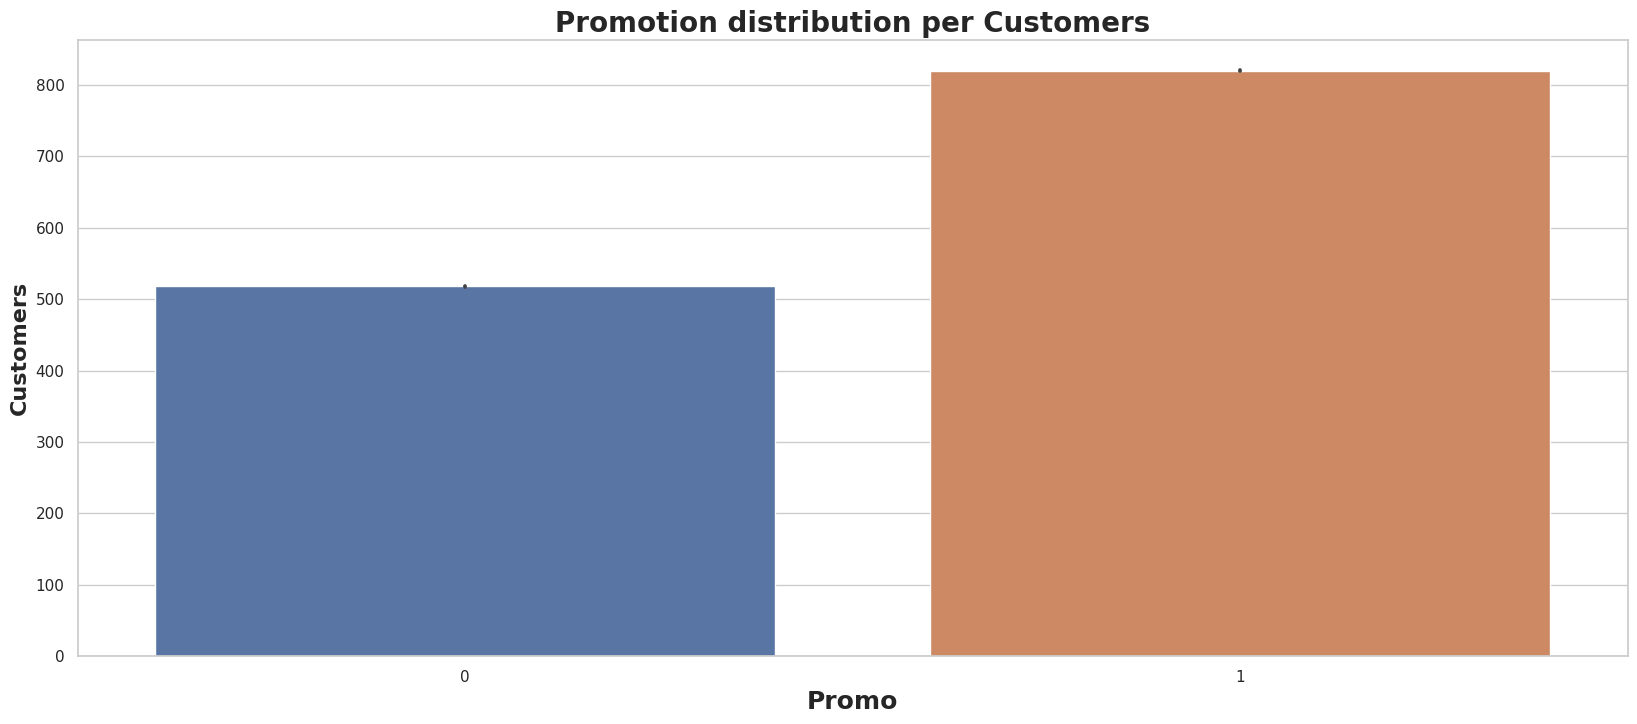

In [179]:
sns.barplot(x = df_train["Promo"] , y = df_train["Customers"])
plt.xticks(rotation=0)
plt.title(f'Promotion distribution per Customers', size=20, fontweight='bold')
plt.xlabel('Promo', fontsize=18, fontweight = 'bold')
plt.ylabel('Customers', fontsize=16, fontweight = 'bold')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


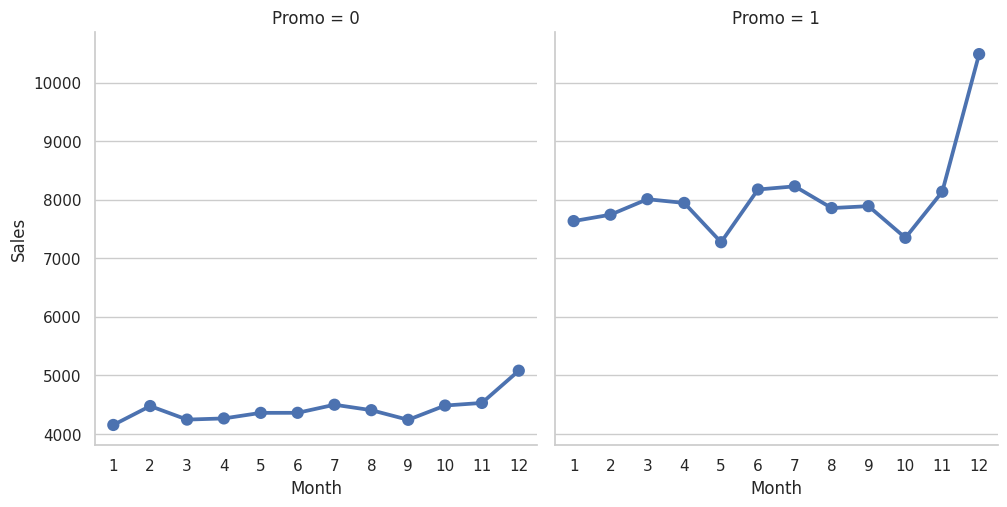

In [155]:
sns.factorplot(data = train_store, x = 'Month', y = "Sales",col = 'Promo')
plt.show()

Promotion have a major impact on sales and customer numbers.
As seen in the plot increase in number of sales takes
place throughout the promotion period.
A hug spick in number of promotion is seen toward the end of the year which is the
holiday times.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


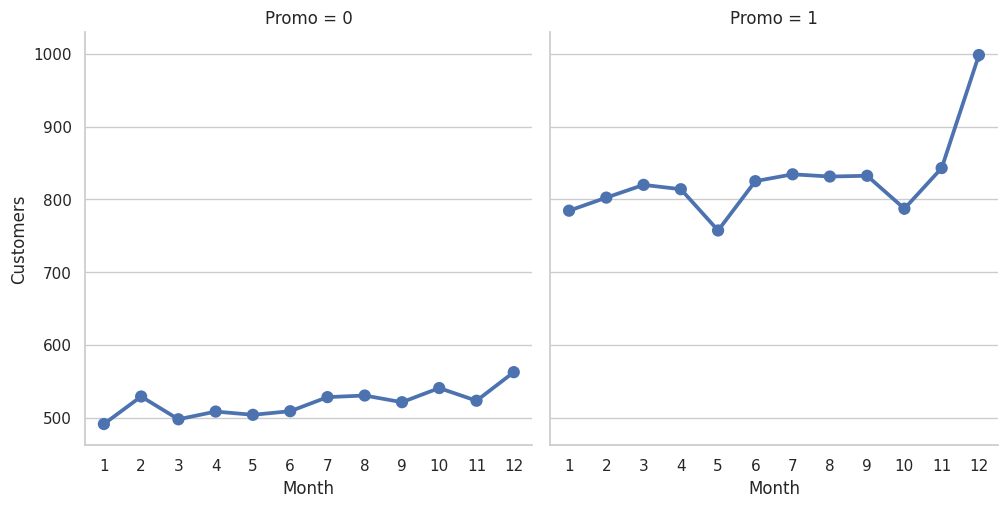

In [156]:
sns.factorplot(data = train_store, x = 'Month', y = "Customers",col = 'Promo')
plt.show()

Promotion increase the number of customers in a great amount
Promotion affect the number of customers on month 11-12 is very high

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


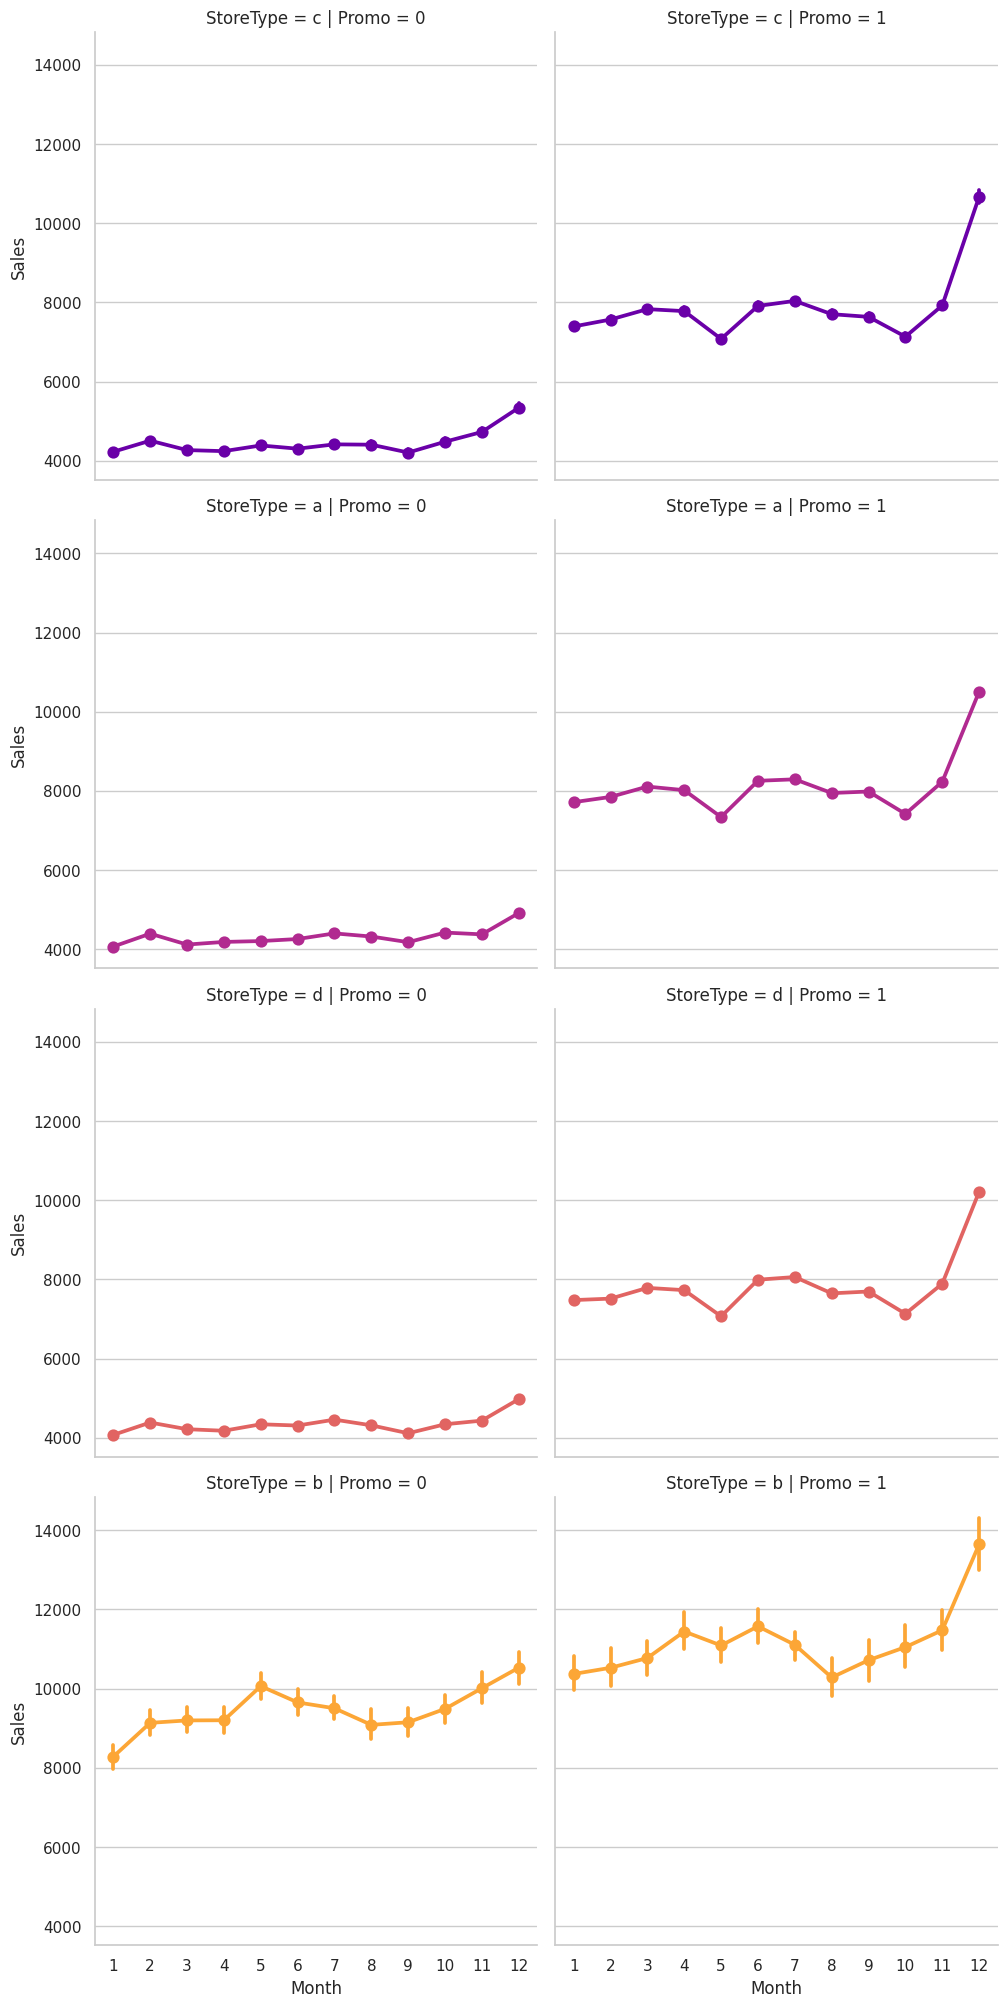

In [157]:
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'Promo', 
               hue = 'StoreType',
               row = 'StoreType',
               palette = 'plasma'
               )
plt.show()

- From the above analysis promotion done on Storetype B and store type A will have a major impact of promotion.
- Focusing more on promoting the end of the year months will increase sales result in a hug amount

In [ ]:
#customers trends
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'Promo', # per store type in cols
               hue = 'StoreType',
               row = 'StoreType', # per promo in the store in rows
               )
plt.show()

In [236]:
comp_store = train_store.groupby("Store").agg({'CompetitionDistance':'max','Sales':'sum'})

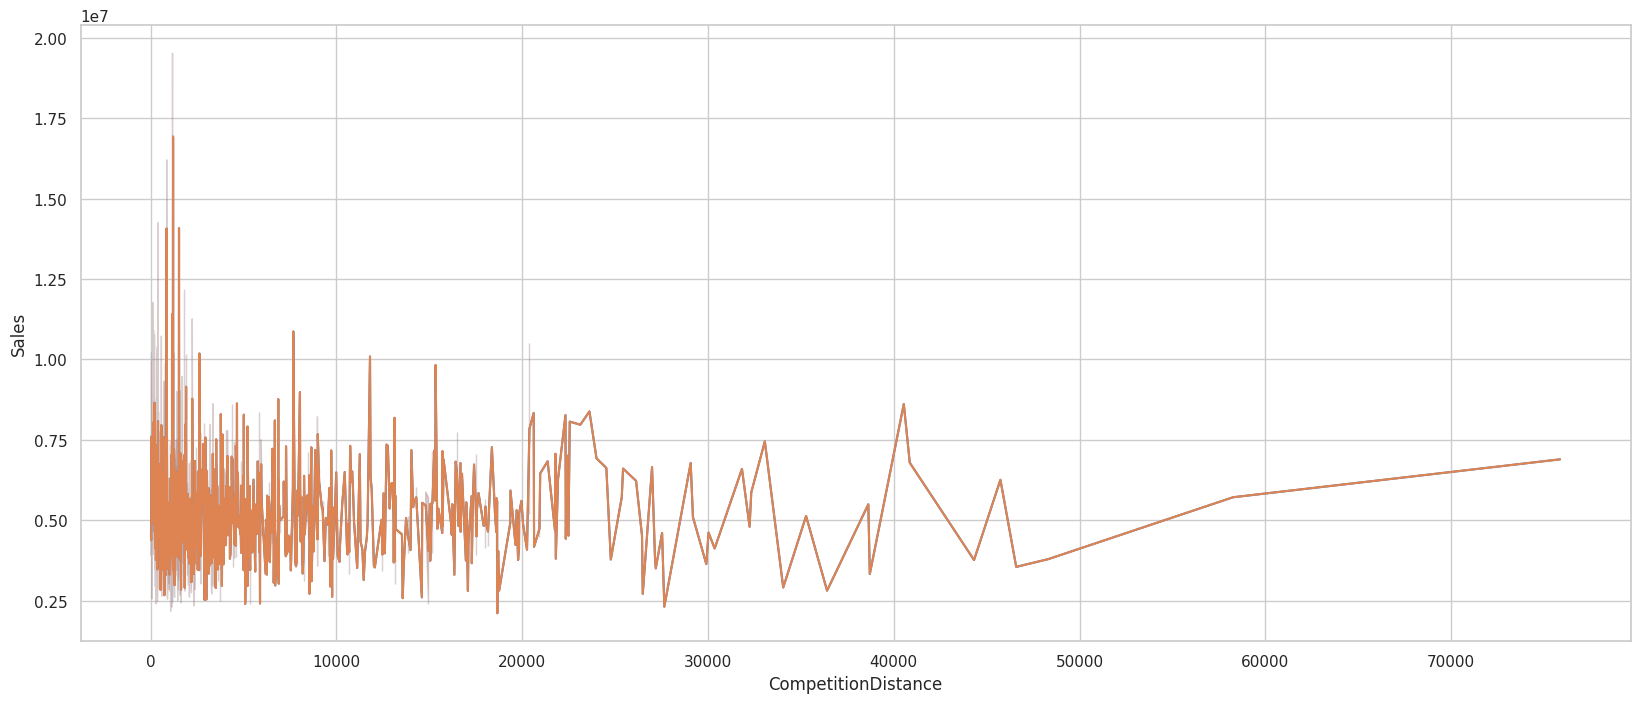

In [238]:
sns.lineplot(x = 'CompetitionDistance',y = "Sales",
             data = comp_store)
plt.show()

The more stores that are in close proximity to each other, the more sales they make.
This suggests that where other stores are within 10 kilometers, sales are higher.

In [242]:
# a function  to create and save logs in the log files
def log(path, file):
    """[Create a log file to record the experiment's logs]
    
    Arguments:
        path {string} -- path to the directory
        file {string} -- file name
    
    Returns:
        [obj] -- [logger that record logs]
    """

    # check if the file exist
    log_file = os.path.join(path, file)

    if not os.path.isfile(log_file):
        open(log_file, "w+").close()

    console_logging_format = "%(levelname)s %(message)s"
    file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"

    # configure logger
    logging.basicConfig(level=logging.INFO, format=console_logging_format)
    logger = logging.getLogger()
    
    # create a file handler for output file
    handler = logging.FileHandler(log_file)

    # set the logging level for log file
    handler.setLevel(logging.INFO)
    
    # create a logging format
    formatter = logging.Formatter(file_logging_format)
    handler.setFormatter(formatter)

    # add the handlers to the logger
    logger.addHandler(handler)

    return logger